Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Batsal Ghimire"
COLLABORATORS = ""

---

# CS110 Pre-class Work 9.1

## Part A. Average number of comparisons when searching


## Question 1. 

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [2]:
def depth(root, node):
    """finds the depth of the node in a BST. depth of root is 0.

    Input:
    - root: a node, the root of the BST
    - node: a node to compute the depth of

    Output:
    - d: int, distance from node to root"""
    d = 0 #Initialize the depth to 0.
    while node!= root: #If the node and root are not equal, then move the node to the parent element and increase the counter of depth by 1.
        node = node.parent
        d += 1
    return d #Return the value of depth.

In [3]:
# Testing code 
import math #Import the math module
#The implementation of BST is from previous pre class work.
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
#         insert(bst, node)
for i in range(len(nodes)):
    #print ('d',depth(bst, nodes[i]))
    #print ('c',int(math.log(i+1,2)))
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [4]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2.

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [5]:
def avg_cmp(bst):
    """Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Input:
    - bst: a Node, the root of the BST
    
    Output:
    - n: float, average number of comparisons"""
    node = bst 
    root = bst
    tot_comp = [] #Initialize the list of total comparisons to be empty.
    
    def rec_search(node):
        if node!= None: #As long as the node is not empty
            rec_search(node.l_child) #Recursive function for the left child.
            tot_comp.append(depth(root, node)+1) #Add the total number of comparisons to the list
            rec_search(node.r_child) #Recursion for right child
    rec_search(node) #Call the runction rec_search
    avg_comp = (sum(tot_comp))/(len(tot_comp))#Finding the average from the given list
    return avg_comp

In [6]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 
## Question 1. 

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [7]:
def max_depth(bst):
    """Finds the maximum depth of node in a BST.
    
    Input:
    - bst: a Node, the root of the BST
    
    Output:
    - h: int, the maximum depth in a BST"""
    height = [-1]
    node = bst
    root = bst
    
    def num_depth(node):
        if node != None:
            num_depth(node.l_child)
            tree_d = depth(root,node)
            if tree_d > max(height):
                height.append(tree_d)
            num_depth(node.r_child)
    num_depth(node)
    max_h = max(height)
    return max_h
        
max_depth(bst)

3

In [8]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2. 

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [9]:
def avg_depth(bst):
    """Computes the average depth of a BST
    
    Input:
    - bst: a Node, root of the BST
    
    Output:
    - avg_d: float, average depth of the BST"""
    avg_d = avg_cmp(bst) - 1
    return avg_d
avg_depth(bst)

1.7777777777777777

In [10]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

The plot below shows the relation between the number of nodes and the average and maximum depth. The scaling as the number of nodes N increases is logarithmic, which is the expected outcome we see with the average height begin log(N).

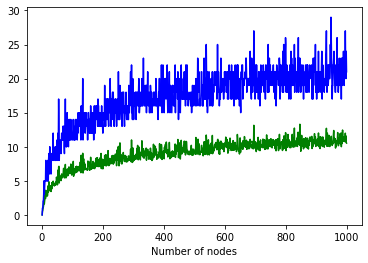

In [13]:
import random
import matplotlib.pyplot as plt
def trees(nodes):
    bst = None
    for node in nodes:
        if not bst:
            bst = node
        else:
            bst.insert(node)
    return bst

depth_max = []
depth_avg = []
num_nodes = []

for node in range(1,1000):
    nodes = [Node(i) for i in range(node)] #Create nodes from the range of values
    random.shuffle(nodes) #Shuffle the list of nodes
    bst = trees(nodes)  #Creates the tree from the nodes
    
    depth_avg.append(avg_depth(nodes[0])) 
    depth_max.append(max_depth(nodes[0]))
    num_nodes.append(node)
    
plt.plot(num_nodes, depth_avg, label = "Average depths", color = "green")
plt.plot(num_nodes, depth_max, label = "Maximum depths", color = "blue")
plt.xlabel("Number of nodes")
plt.show()


## Question 4.

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [14]:
depth_avg1 = []
depth_max1 = []
num_nodes1 = []
iterations = 50

for num in range(1,7):
    max_ = 0
    avg_ = 0
    
    for a in range(iterations): #The number of trials we want to perform
        nodes = [Node(i) for i in range(5**num)]
        random.shuffle(nodes) #Shuffle the list of nodes
        bst = trees(nodes)
        avg_ = avg_ + avg_depth(nodes[0])
        max_ = max_ + max_depth(nodes[0])

    depth_avg1.append(avg_/iterations)
    depth_max1.append(max_/iterations)
    num_nodes1.append(5**num)

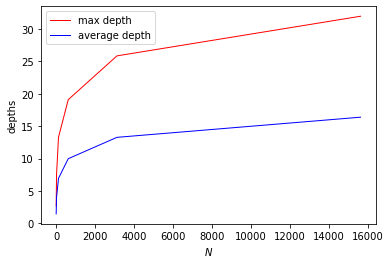

In [15]:
plt.plot(num_nodes1, depth_max1, color = 'red',label = 'max depth')
plt.plot(num_nodes1, depth_avg1, color = 'blue',label = 'average depth')
plt.legend()
plt.show()

This plot is also consistent with what we found before. Since we ran the trials multiple times and increased the number of nodes, the noise is less prominent. This gives us more accurate behavior, by the scaling is still logarithmic.